

# Simple Linear Regression with Sacramento Real Estate Data

In this lab we will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
#Link to dataset
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
#Reading the csv andchecking it
sac_df = pd.read_csv(sac_csv)
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
#Checking the number of rows
len(sac_df)

985

In [5]:
#Finding null values`
sac_df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [6]:
#Checking columns
sac_df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [7]:
####Only to be done when there is more complex data
# from datetime import datetime
# sac_df['sale_date'] = sac_df['sale_date'].map(lambda a: a.replace('EDT','') )
# sac_df['sale_date'] = sac_df['sale_date'].apply(lambda x:  datetime.strptime(x, '%a %B %d %H:%M:%S %Y'))
# sac_df['sale_date'].dt.date.value_counts()

In [8]:
sac_df['sale_date'] = pd.to_datetime(sac_df['sale_date'])

/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [9]:
correln = sac_df.corr()[['price']].sort_values(by = 'price',ascending = False)

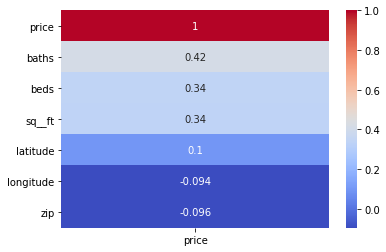

In [10]:
sns.heatmap(correln, annot = True, cmap = 'coolwarm');

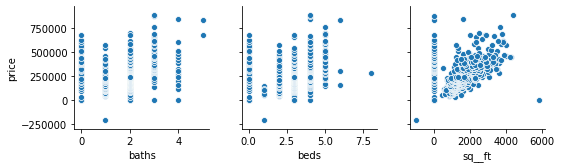

In [11]:
#baths, beds and sq__ft are the variables that I think would affect price
sns.pairplot(data = sac_df, x_vars = ['baths', 'beds', 'sq__ft'], y_vars = 'price');

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

Square footage which is also numeric variable may prove to be a good predictor since it has a linear relation to Price and would ideally work better on SLR. Though the number of baths has the highest correlation to price.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [12]:
#function to find slope and intercept
from scipy import stats
def interslope(X,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
    return {'slope': slope, 'intercept': intercept}

### 6. Interpret the intercept. Interpret the slope.

In [13]:
inter_slope = interslope(sac_df['sq__ft'],sac_df['price'])

The slope which is 55.177 means that with every unit increase in square feet the price increases by 55. 

The intercept of 161272 means that if there was no house(0 sq ft) the price would be 161272(Maybe price of land).

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [14]:
#Example of a prediction using this model
slope = inter_slope['slope']
intercept = inter_slope['intercept']

#Prediction for a house with 100 square feet
sq_feet = float(input("Please enter your area in square feet:  "))
price = intercept + (slope * sq_feet)

print (f'\nPredicted price of a {sq_feet} square foot house is {round(price,2)} dollars')

Please enter your area in square feet:  800

Predicted price of a 800.0 square foot house is 205414.52 dollars


### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [15]:
#Finding the pedicted prices
price_pred = [ (intercept + (slope * a)) for a in sac_df['sq__ft'] ]

In [16]:
#Finding residuals
residuals = price_pred - sac_df['price']

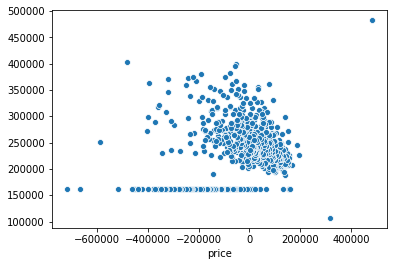

In [17]:
#Plotting residuals vs predicted price
sns.scatterplot(residuals, price_pred)

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [18]:
#Creating dummy variables
sac_df = pd.get_dummies(sac_df, columns = ['type'])

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [19]:
#Checking dataframe
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,2008-05-21,59222,38.631913,-121.434879,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,2008-05-21,68212,38.478902,-121.431028,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,2008-05-21,68880,38.618305,-121.443839,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,2008-05-21,69307,38.616835,-121.439146,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,2008-05-21,81900,38.519470,-121.435768,0,0,1,0


In [20]:
#Drpping type_unknown column
sac_df.drop(columns = ['type_Unkown'], inplace= True)

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

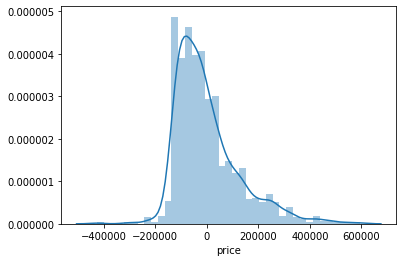

In [21]:
#Choosing the model
model = LinearRegression()

#Creating features
features = ['sq__ft', 'type_Residential', 'baths']
X =  sac_df[features]
y = sac_df['price']

#Fitting the model\
model.fit(X,y)

#Predictions
y_pred = model.predict(X)
residuals = y - y_pred

sns.distplot(residuals)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

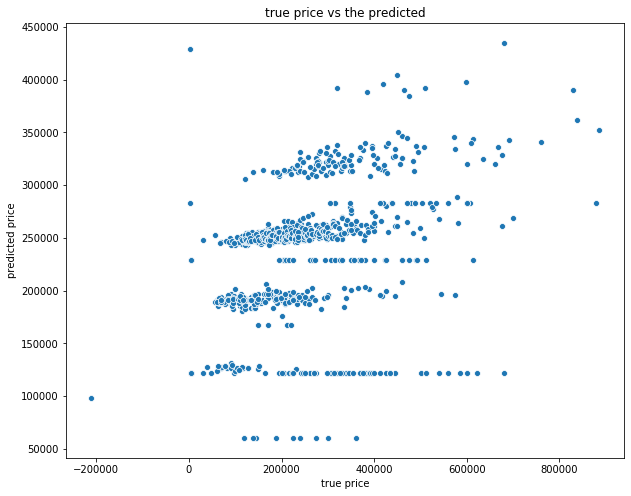

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(y,y_pred)
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.title('true price vs the predicted');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

Linearity: Y must have an approximately linear relationship with each independent X_i.

I do not believe that this condition is met as not all variables have a linear relationship with price. example type residential.

Normality: The errors (residuals) follow a Normal distribution.
The residual distribution in my case actually is right skewed. This assumption was also not met accurately 

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [23]:
#Sumarry stats of a mode
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1205.
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:34:06   Log-Likelihood:                -12963.
No. Observations:                 985   AIC:                         2.593e+04
Df Residuals:                     982   BIC:                         2.595e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sq__ft              15.6749      6.306      2.486      0.013       3.300      28.050
type_Residential  1.099e+05   8508.206     12.917      0.000    9.32e+04    1.27e+05
baths             6.045e+04   5686.614     10.630      0.000    4.93e+04    7.16e+04
==============================================================================
Omnibus:                      240.609   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.599
Skew:                           1.341   Prob(JB):                    2.23e-116
Kurtosis:                       5.406   Cond. No.                     3.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [24]:
#Function that returns the adjusted r-square of a model
import statsmodels.api as sm
def r2_adj(X,y):
    model = sm.OLS(y,X).fit()
    return model.rsquared_adj

r2_adj(X,y)

0.7856738816263419

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [25]:
def metrics_model(y, y_pred):
    return {'r2_score': metrics.r2_score(y,y_pred),
            'MAE': metrics.mean_absolute_error(y,y_pred),
            'MSE' : metrics.mean_squared_error(y,y_pred),
            'ME': np.mean(y - y_pred),
            'Variance': metrics.explained_variance_score(y,y_pred),
            'ADj. Rand':metrics.adjusted_rand_score(y,y_pred)
           }



### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [26]:
metrics_model(y,y_pred)

{'r2_score': 0.19311017571449984,
 'MAE': 93552.33773140726,
 'MSE': 15594000542.613533,
 'ME': 1.49212531783254e-11,
 'Variance': 0.19311017571449973,
 'ADj. Rand': 0.26386956309681764}

In [27]:
#Choosing the model with only many numerical predictor
model = LinearRegression()

#Creating features
features = ['beds', 'baths', 'sq__ft', 'latitude', 'longitude',
       'type_Condo', 'type_Multi-Family', 'type_Residential']
X =  sac_df[features]
y = sac_df['price']

#Fitting the model\
model.fit(X,y)

#Predictions
y_pred = model.predict(X)

metrics_model(y,y_pred)

{'r2_score': 0.25826387576835497,
 'MAE': 88320.70784152183,
 'MSE': 14334836275.803291,
 'ME': 3.4983690620073814e-09,
 'Variance': 0.25826387576835486,
 'ADj. Rand': 0.003032526342262747}

In [28]:
#Choosing the model with only square feet as predictor
model = LinearRegression()

#Creating features
features = ['sq__ft']
X =  sac_df[features]
y = sac_df['price']

#Fitting the model\
model.fit(X,y)

#Predictions
y_pred = model.predict(X)

metrics_model(y,y_pred)

{'r2_score': 0.11534735226635717,
 'MAE': 96052.4062272969,
 'MSE': 17096849475.079973,
 'ME': -1.4448500602378457e-11,
 'Variance': 0.11534735226635706,
 'ADj. Rand': 0.1359971111553665}

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

The model just has high Bias. It is just not performing well on the training data itself. The R2 scores of less than 30% are evidences for this. There is pure evidence of underfitting in this data.